In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [2]:
# Define a simple neural network architecture
class EEGNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv1d(in_channels=4, out_channels=16, kernel_size=5),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=16, out_channels=32, kernel_size=5),
            nn.MaxPool1d(kernel_size=2),
            nn.Linear(in_features=32*58, out_features=128),  # Adjust the in_features depending on the time sequence
            nn.Linear(in_features=128, out_features=26)  # There are 26 possible outputs (A-Z)
        )

    def forward(self, x):
        return self.model(x)

In [3]:
# Create the neural network
net = EEGNet()

In [4]:
net

EEGNet(
  (model): Sequential(
    (0): Conv1d(4, 16, kernel_size=(5,), stride=(1,))
    (1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv1d(16, 32, kernel_size=(5,), stride=(1,))
    (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Linear(in_features=1856, out_features=128, bias=True)
    (5): Linear(in_features=128, out_features=26, bias=True)
  )
)

In [5]:
# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [18]:
# Prepare your dataset
# X would be your EEG data with shape (n_samples, 4, 250) where n_samples is the number of EEG samples,
# 4 is the number of channels, and 250 is the number of time points in each sample.
# y would be the target characters converted to integer labels with shape (n_samples,).

    # Example (dummy data and labels):
    X_dummy = torch.randn(27, 4, 250)  # 100 samples of 4-channel EEG data
    y_dummy = torch.linspace(0, 26, steps=27)  # 26 character labels

In [19]:
y_dummy.size()

torch.Size([27])

In [20]:
X_dummy.size()

torch.Size([27, 4, 250])

In [21]:
# The number of channels
channels = X_dummy.shape[1]
sample = 0

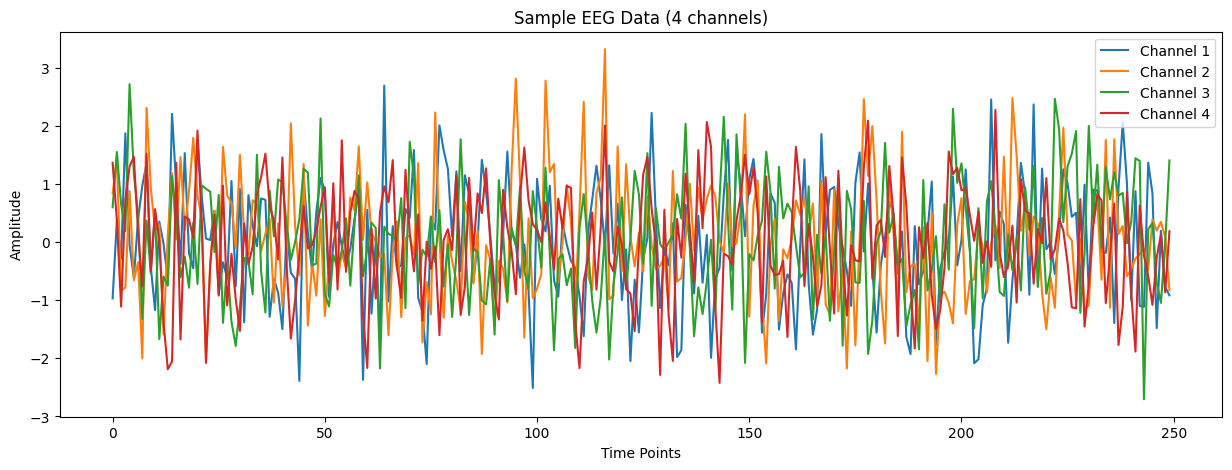

In [22]:
import matplotlib.pyplot as plt

# Plot the EEG data (4 channels)
plt.figure(figsize=(15, 5))
for i in range(channels):
    plt.plot(X_dummy[sample, i, :], label=f'Channel {i+1}')
plt.legend()
plt.title('Sample EEG Data (4 channels)')
plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.show()

In [25]:
# Create a DataLoader instance
dataset = TensorDataset(X_dummy, y_dummy)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
print(dataset)
print(dataloader)

In [26]:
# Training loop
for epoch in range(2):  # loop over the dataset multiple times
    for i, data in enumerate(dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        if i % 10 == 9:    # print every 10 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, loss.item()))

print('Finished Training')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x59 and 1856x128)